# Data Modeling
# Submitted by Team 147
## July 25, 2021

### Avery Fisher / Busayo Alagbe / James Gosserand / Tioluwanimi Olunowo

# Hypothesis

We seek to explore the negative impact of food deserts and food swamps on the health outcomes in African American communities. Our hypothesis is that this impact is significant. To test this hypothesis, we selected the rate of African Americans deaths due to cardiovascular diseases (the number one killer in this population group) as the dependent variable and seek to demonstrate that it could be predicted by the percentage of black people living in food deserts and food swamps within a county.

# Model Setup

A linear regression model was selected to explore the expected relationship between the rate of African Americans deaths due to cardiovascular diseases and the percentage of black people living in food deserts and food swamps within a county.

## Libraries and Data Import

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf

In [4]:
data = pd.read_csv('master.csv')

## Data cleaning and conditioning

First, we view the top 5 rows to ensure the data load was successful.

In [5]:
data.head()

,Unnamed: 0,No. of Fast-Food,No. Full-Service,No. Fast-Food per '000,No. Full-Service per '000,Avg. Expenditure Fast-Food,Avg. Expenditure Full-Service,No. Conviniece stores,No. Grocery store,No. Supercenter store,...,Hisp_Deaths,perc_AI_Alask201519,AI_Alask_Deaths,perc_Asia_PI201519,Asia_PI_Deaths,Obesity_2017,Diabetes_2017,HighChol_2017,Inactivity_2017,UrbanRural_2013
0,0,44,31,0.795977,0.560802,674.80272,512.280987,31,3,1,...,NaN,0.2,NaN,1.0,NaN,32.7,11.4,37.0,30.2,3.0
1,1,156,236,0.751775,1.137300,674.80272,512.280987,118,29,7,...,NaN,0.6,NaN,0.9,NaN,30.1,8.2,40.1,23.5,3.0
2,2,23,14,0.892372,0.543183,674.80272,512.280987,19,4,1,...,NaN,0.2,NaN,0.4,NaN,41.2,15.1,41.1,26.7,4.0
3,3,7,7,0.309283,0.309283,674.80272,512.280987,15,5,1,...,NaN,0.1,NaN,0.1,NaN,37.4,12.2,38.5,33.1,2.0
4,4,23,12,0.399569,0.208471,674.80272,512.280987,27,5,1,...,NaN,0.0,NaN,0.4,NaN,32.5,12.2,40.8,32.6,2.0


In [6]:
data.size

147721

In order to ensure that the model runs properly, we drop counties that have 0% black people

In [7]:
has_black_pop=data[data["perc_black"]>0]

In [8]:
has_black_pop["perc_black"].describe()

count    2950.000000
mean        9.478034
std        14.759877
min         0.100000
25%         0.700000
50%         2.500000
75%        10.975000
max        87.200000
Name: perc_black, dtype: float64

We then estimate the percentage of black people that live in a food desert within each county. Based on the CDC definition, food deserts are areas that are farther than 10 miles from a grocery store in an grocery area and one mile from a grocery store in an urban area. The column 'UrbanRural_2013' gives the degree of 'urbanness' of a county with 1 being fully metropolitan and 4 being non-metropolitan. Using the food access and the 'UrbanRural_2013' information, we are then able to estimate the percentage of black people as shown below: 

In [9]:
has_black_pop["UrbanRural_2013"].unique()

array([3., 4., 2., 1.])

In [10]:
#Creates column for percentage of black people in food desert
def get_percentage(row,cutoff):
    if row["UrbanRural_2013"]<cutoff:
        value=row["lablack1"] / (row["Total_Population"] * row["perc_black"]*.01)
    else:
        value=row["lablack10"] / (row["Total_Population"] * row["perc_black"]*.01)
    return value

In [11]:
has_black_pop["food_desert_percentage"]=has_black_pop.apply(lambda row: get_percentage(row,3.5), axis=1)

<ipython-input-11-838dc6b98c8d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  has_black_pop["food_desert_percentage"]=has_black_pop.apply(lambda row: get_percentage(row,3.5), axis=1)


In [12]:
has_black_pop.tail()

,Unnamed: 0,No. of Fast-Food,No. Full-Service,No. Fast-Food per '000,No. Full-Service per '000,Avg. Expenditure Fast-Food,Avg. Expenditure Full-Service,No. Conviniece stores,No. Grocery store,No. Supercenter store,...,perc_AI_Alask201519,AI_Alask_Deaths,perc_Asia_PI201519,Asia_PI_Deaths,Obesity_2017,Diabetes_2017,HighChol_2017,Inactivity_2017,UrbanRural_2013,food_desert_percentage
3136,3136,23,32,0.765416,1.064927,598.027144,706.676425,13,8,1,...,1.7,NaN,0.6,NaN,28.9,6.8,35.1,20.9,4.0,0.049768
3138,3138,31,32,0.700644,0.723246,598.027144,706.676425,22,4,1,...,1.0,NaN,0.7,NaN,30.1,8.0,30.4,24.1,4.0,0.029244
3139,3139,20,59,0.862813,2.545298,598.027144,706.676425,19,11,0,...,0.3,NaN,1.3,NaN,11.0,2.2,28.7,10.7,4.0,0.009706
3140,3140,17,19,0.820820,0.917387,598.027144,706.676425,13,2,1,...,0.6,NaN,0.1,NaN,34.9,9.5,33.8,24.5,4.0,0.000000
3142,3142,4,10,0.555710,1.389275,598.027144,706.676425,4,4,0,...,0.1,NaN,0.8,NaN,36.8,9.2,36.3,24.0,4.0,0.000000


Next, we drop all the rows with NAs in our response variable column

In [13]:
filtered=has_black_pop.dropna(subset=['Black_Deaths'])

Next we added some features to the data for easier computation.

In [15]:
filtered["fast_food_percent"]=filtered["No. Fast-Food per \'000"]

<ipython-input-15-87db3d7f3d79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["fast_food_percent"]=filtered["No. Fast-Food per \'000"]


In [16]:
filtered["full_service_percent"]=filtered["No. Full-Service per \'000"]

<ipython-input-16-cbfc0c74f422>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["full_service_percent"]=filtered["No. Full-Service per \'000"]


In [17]:
filtered["median_household_income"]=filtered["Median Household Income"]

<ipython-input-17-65090aba3663>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["median_household_income"]=filtered["Median Household Income"]


In [18]:
filtered['poverty_rate']=filtered["% Poverty rate"]

<ipython-input-18-0a9cb82a4ee8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['poverty_rate']=filtered["% Poverty rate"]


In [19]:
filtered["TractSNAP_percent"]=filtered["TractSNAP"]/filtered["Total_Population"]
filtered["TractLOWI_percent"]=filtered["TractLOWI"]/filtered["Total_Population"]

<ipython-input-19-9c09817654e6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["TractSNAP_percent"]=filtered["TractSNAP"]/filtered["Total_Population"]
<ipython-input-19-9c09817654e6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered["TractLOWI_percent"]=filtered["TractLOWI"]/filtered["Total_Population"]


In [20]:
filtered.head()

,Unnamed: 0,No. of Fast-Food,No. Full-Service,No. Fast-Food per '000,No. Full-Service per '000,Avg. Expenditure Fast-Food,Avg. Expenditure Full-Service,No. Conviniece stores,No. Grocery store,No. Supercenter store,...,HighChol_2017,Inactivity_2017,UrbanRural_2013,food_desert_percentage,fast_food_percent,full_service_percent,median_household_income,poverty_rate,TractSNAP_percent,TractLOWI_percent
0,0,44,31,0.795977,0.560802,674.80272,512.280987,31,3,1,...,37.0,30.2,3.0,0.631537,0.795977,0.560802,56580.0,12.7,0.048429,0.337523
1,1,156,236,0.751775,1.137300,674.80272,512.280987,118,29,7,...,40.1,23.5,3.0,0.552965,0.751775,1.137300,52387.0,12.9,0.030405,0.297312
2,2,23,14,0.892372,0.543183,674.80272,512.280987,19,4,1,...,41.1,26.7,4.0,0.212374,0.892372,0.543183,31433.0,32.0,0.082686,0.492252
3,3,7,7,0.309283,0.309283,674.80272,512.280987,15,5,1,...,38.5,33.1,2.0,0.759587,0.309283,0.309283,40767.0,22.2,0.050016,0.450051
5,5,3,1,0.287329,0.095776,674.80272,512.280987,6,3,0,...,39.2,42.3,4.0,0.208638,0.287329,0.095776,28251.0,39.6,0.077479,0.515125


## Initial Data Exploration and Modeling

First, we inspect the columns of interest and perform a visual inspection of the crossplot between both variables.

In [21]:
filtered["Black_Deaths"].describe()

count    1118.000000
mean      317.952147
std        84.472060
min       104.500000
25%       261.250000
50%       309.100000
75%       363.875000
max       817.700000
Name: Black_Deaths, dtype: float64

In [22]:
filtered["food_desert_percentage"].describe()

count    1118.000000
mean        0.292380
std         0.271141
min         0.000000
25%         0.046728
50%         0.237207
75%         0.453282
max         1.318425
Name: food_desert_percentage, dtype: float64

In [23]:
filtered.shape

(1118, 54)

In [26]:
filtered["food_desert_percentage"].replace(0,0.00001)

0       0.631537
1       0.552965
2       0.212374
3       0.759587
5       0.208638
          ...   
3060    0.305100
3077    0.166255
3088    0.068551
3099    0.315468
3101    0.370699
Name: food_desert_percentage, Length: 1118, dtype: float64

In [29]:
filtered["Black_Deaths"].isnull().values.any()

False

In [30]:
filtered["food_desert_percentage"].isnull().values.any()

False

In [31]:
filtered["food_desert_percentage"].describe()

count    1118.000000
mean        0.292381
std         0.271141
min         0.000007
25%         0.046728
50%         0.237207
75%         0.453282
max         1.318425
Name: food_desert_percentage, dtype: float64

[]

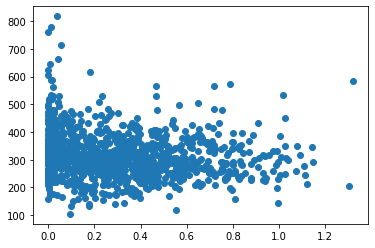

In [32]:
x=filtered["food_desert_percentage"]
y=filtered['Black_Deaths']
plt.scatter(x, y)
plt.plot()

Next, we explore the distribution of the response variable (rate of African Americans deaths due to cardiovascular diseases) and primary independent variable ("food_desert_percentage") using the Qaurtile-Quartile (QQ) plot.

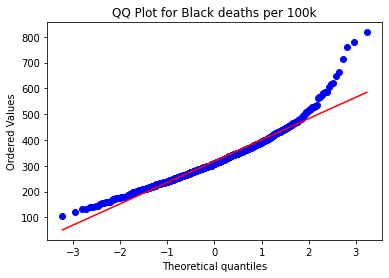

In [33]:
#checking dependent variable for normality
stats.probplot(x=filtered['Black_Deaths'], dist="norm", plot=plt)
plt.title("QQ Plot for Black deaths per 100k")
plt.show()

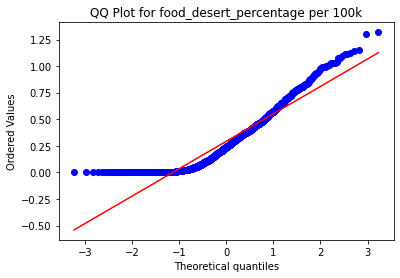

In [34]:
#checking prediction variable for normality
stats.probplot(x=filtered['food_desert_percentage'], dist="norm", plot=plt)
plt.title("QQ Plot for food_desert_percentage per 100k")
plt.show()

The deviation of the points from the straight line indicates that the distributions deviates from a normal distribution.

A box-cox criterion was then used to assess the non-linearity of the variables and to determine the appropraite transform to use for modeling.

In [35]:
#checking dependent variable
transformed_outcomes, lamda_outcomes =stats.boxcox(filtered['Black_Deaths'])
lamda_outcomes

0.11720885515093821

In [36]:
#checking prediction variable
transformed_outcomes2, lamda_outcomes2 =stats.boxcox(filtered['food_desert_percentage'])
lamda_outcomes2

0.3406791993167708

Based on the box-cox criterion, transforming both variables to log form will be beneficial for the model. Hence the linear regression model was defined as below:

In [52]:
#Single variable model. Couldnt use log on the food desert, I think because there are some values that are 0
model = smf.ols(formula='np.log(Black_Deaths) ~ np.log(food_desert_percentage)', data=filtered).fit()

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Black_Deaths)   R-squared:                       0.039
Model:                              OLS   Adj. R-squared:                  0.038
Method:                   Least Squares   F-statistic:                     45.72
Date:                  Mon, 26 Jul 2021   Prob (F-statistic):           2.20e-11
Time:                          03:12:59   Log-Likelihood:                -61.805
No. Observations:                  1118   AIC:                             127.6
Df Residuals:                      1116   BIC:                             137.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          5.6804      0.010    545.708      0.000       5.660       5.701
np.log(food_desert_percentage)    -0.0196      0.003     -6.762      0.000      -0.025      -0.014
==============================================================================
Omnibus:                       23.475   Durbin-Watson:                   1.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.981
Skew:                          -0.179   Prob(JB):                     9.32e-09
Kurtosis:                       3.816   Cond. No.                         5.05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model has a R-squared value of .039. Although we didn’t expect food deserts to predict all of the deaths due to cardiovascular diseasse, this R-squared value was smaller than we had expected.

## Data exploration and inclusion of additional predictors

Based on the results from all the previous model, we decided to include additional prediction variables to help with improving the model accuracy. We estimated that additional variables probably had a large impact, especially poverty rate and average household income, since they are indicators of socioeconomic status, which we expected to have a large impact on health outcomes.

The cells below show how we explored the relationship between these additional variables and the response variable in addition to the model performance after including these in the model.

In [ ]:
#Inspecting different inputs to see if there are transformations that could make this better

[]

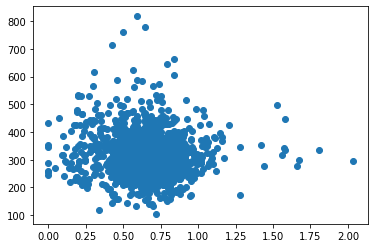

In [39]:
x=filtered["fast_food_percent"]
y=filtered['Black_Deaths']
plt.scatter(x, y)
plt.plot()

[]

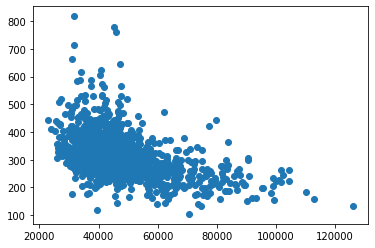

In [40]:
x=filtered["median_household_income"]
y=filtered['Black_Deaths']
plt.scatter(x, y)
plt.plot()

[]

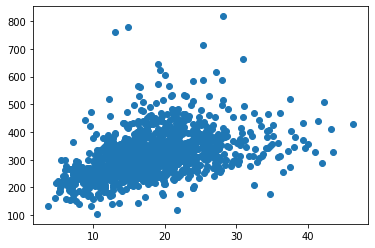

In [41]:
x=filtered["poverty_rate"]
y=filtered['Black_Deaths']
plt.scatter(x, y)
plt.plot()

[]

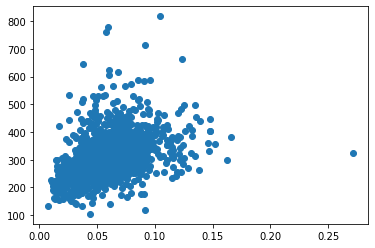

In [42]:
x=filtered["TractSNAP_percent"]
y=filtered['Black_Deaths']
plt.scatter(x, y)
plt.plot()

[]

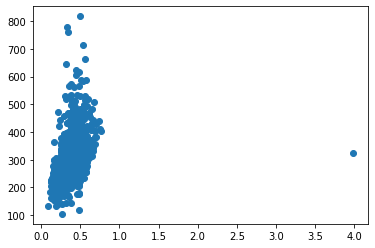

In [43]:
x=filtered["TractLOWI_percent"]
y=filtered['Black_Deaths']
plt.scatter(x, y)
plt.plot()

[]

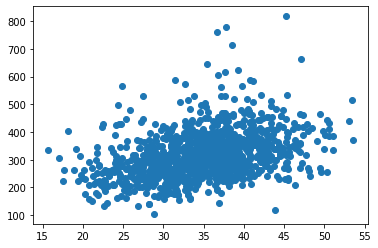

In [44]:
x=filtered["Obesity_2017"]
y=filtered['Black_Deaths']
plt.scatter(x, y)
plt.plot()

[]

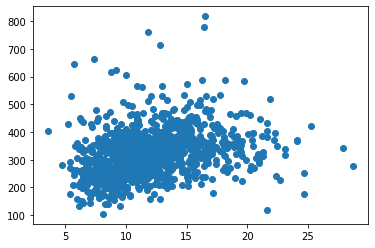

In [45]:
x=filtered["Diabetes_2017"]
y=filtered['Black_Deaths']
plt.scatter(x, y)
plt.plot()

In [48]:
#Trying a model with everything
model = smf.ols(formula='np.log(Black_Deaths) ~ food_desert_percentage + fast_food_percent + full_service_percent + median_household_income + poverty_rate + TractSNAP_percent + TractLOWI_percent + urban_pop + Total_Population + perc_black + perc_white + Obesity_2017 + Diabetes_2017 + HighChol_2017 + Inactivity_2017', data=filtered).fit()

In [49]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     np.log(Black_Deaths)   R-squared:                       0.352
Model:                              OLS   Adj. R-squared:                  0.343
Method:                   Least Squares   F-statistic:                     39.84
Date:                  Mon, 26 Jul 2021   Prob (F-statistic):           8.80e-93
Time:                          03:09:43   Log-Likelihood:                 157.95
No. Observations:                  1118   AIC:                            -283.9
Df Residuals:                      1102   BIC:                            -203.6
Df Model:                            15                                         
Covariance Type:              nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   5.1297      0.170     30.125      0.000       4.796       5.464
food_desert_percentage     -0.0590      0.026     -2.311      0.021      -0.109      -0.009
fast_food_percent           0.1295      0.038      3.406      0.001       0.055       0.204
full_service_percent       -0.0137      0.027     -0.500      0.617      -0.067       0.040
median_household_income -4.347e-06   1.11e-06     -3.908      0.000   -6.53e-06   -2.16e-06
poverty_rate                0.0070      0.002      2.823      0.005       0.002       0.012
TractSNAP_percent          -1.0906      0.502     -2.175      0.030      -2.075      -0.107
TractLOWI_percent           0.3429      0.165      2.079      0.038       0.019       0.667
urban_pop               -6.538e-08   7.55e-08     -0.866      0.386   -2.13e-07    8.27e-08
Total_Population         5.003e-08   7.31e-08      0.684      0.494   -9.34e-08    1.93e-07
perc_black                 -0.0024      0.001     -3.358      0.001      -0.004      -0.001
perc_white                  0.0003      0.001      0.412      0.680      -0.001       0.002
Obesity_2017                0.0054      0.002      3.540      0.000       0.002       0.008
Diabetes_2017              -0.0025      0.002     -1.011      0.312      -0.007       0.002
HighChol_2017               0.0082      0.003      2.903      0.004       0.003       0.014
Inactivity_2017             0.0049      0.002      3.211      0.001       0.002       0.008
==============================================================================
Omnibus:                       44.759   Durbin-Watson:                   1.748
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              125.446
Skew:                          -0.074   Prob(JB):                     5.75e-28
Kurtosis:                       4.634   Cond. No.                     5.55e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.55e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The model has now improved to a R-squared value of .352. This was a significant improvement over our single variable prediction model, but still isn’t nearly high enough for us to be confident that our model has strong predicting power.

## Next Steps

We intend to carry out the following next steps in the coming weeks to improve our predictive model:

    - Investigate interraction effects between prediction variables
    - Investigate using another model type instead of a simple regression model